In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from constants import FIGSIZE

In [7]:
# Powermeter data ([°], [°], [W], [W])
theta_rel_arr, theta_abs_arr, P_arr, std_P_arr = np.loadtxt(
    fname='data/Powermeter/Messwerttabellen - Polarisationseigenschaften.csv',
    delimiter=',',
    skiprows=1
).T

# Adjustment error for theta_rel [°]
std_theta_rel = 1

In [8]:
# Define fit function
fit_function = lambda theta, A, B: A * (np.sin(theta * np.pi / 180)) ** 2 + B

# Calculate some educated guesses on initial values
A_0 = P_arr.max() - P_arr.min()
B_0 = P_arr.min()
print(f'Intitial params: {[A_0, B_0]}')

# Compute the fit
fitted_params, _ = curve_fit(fit_function, theta_rel_arr, P_arr, p0=(A_0, B_0))
print(f'Fitted params: {fitted_params}')

Intitial params: [0.00113484, 5.16e-06]
Fitted params: [1.13251702e-03 4.46512828e-06]


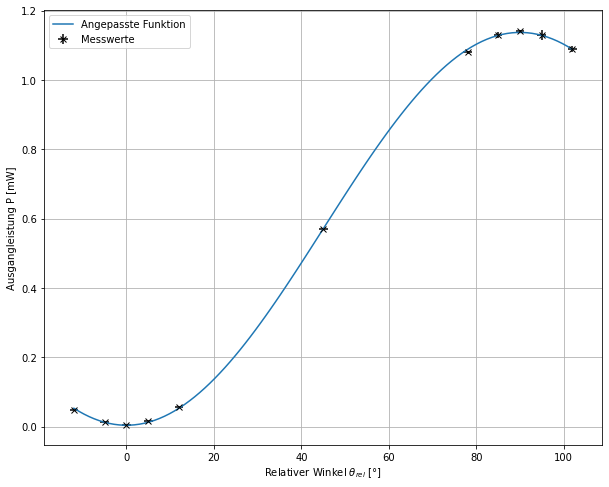

In [9]:
# Create plot
fig, ax = plt.subplots(figsize=FIGSIZE)
ax.set_xlabel('Relativer Winkel $\\theta_{rel}$ [°]')
ax.set_ylabel('Ausgangleistung P [mW]')
ax.grid()

# Plot measurements, convert power values to mW
ax.errorbar(x=theta_rel_arr, xerr=std_theta_rel, y=P_arr * 1e3, yerr=std_P_arr * 1e3,
            fmt='kx', label='Messwerte')

# Create angle data for plotting
theta_plot_arr = np.linspace(theta_rel_arr.min(), theta_rel_arr.max(), 100)
# Plot the fitted function, convert power values to mW
ax.plot(theta_plot_arr, fit_function(theta_plot_arr, *fitted_params) * 1e3,
        label=f'Angepasste Funktion')
ax.legend()

In [10]:
fig.savefig('figs/aufgabe1.3b.svg', bbox_inches='tight')
